In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import cbtk.kegg as kegg_api
plt.rcParams['font.family'] = 'Arial'


In [25]:
#df = pd.read_csv("../data/pterinCounts.26Oct2022.csv",index_col=0)
df = pd.read_csv("../data/pterinCounts.12Nov2022.csv",index_col=0)
df = df.drop("total_genes",axis=1)
df['genome'] = df['genome'].apply(lambda x: x.split('_protein')[0])

In [7]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict
0,GB_GCA_014654065.1,0,773,{}
1,GB_GCA_002479145.1,0,722,{}
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000..."
3,GB_GCA_903829855.1,0,886,{}
4,GB_GCA_002923395.1,0,284,{}
...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{}
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'}
65700,RS_GCF_001953955.1,0,959,{}
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01..."


In [4]:
#sulfur = pd.read_csv("../data/gtdb/geneCounts/sulfurMetabolismGeneCounts.12Feb2023.csv",index_col=0)
sulfur = pd.read_csv("../data/gtdb/geneCounts/sulfideGeneCounts.12Feb2023.csv",index_col=0)

In [3]:
google_sheet = 'https://docs.google.com/spreadsheets/d/1WjqoaGkUAWqmktBSK3kuq_SeBeLk-PwOJqBHa5Cvizk/export?gid=0&format=csv'
mwpterins = pd.read_csv(google_sheet)
pterin_ko = [x.split(',') for x in mwpterins['KO (pterin domain)'].dropna().tolist()]
mo_pterin = list(set([item for sublist in pterin_ko for item in sublist]))

In [6]:
# download seqs for gene families and run through embedding to prediction tool
#dfs = []
#for gene in mo_pterin:
#  dfs.append(kegg_api.ko2genes(gene))
#d1fs = pd.concat(dfs,axis=0)

In [355]:
#dfs.to_csv("../data/pterinBindingGenesKegg.csv")

In [353]:
# download ~25k sequence and embedd these on HPC
#kegg_api.download_aa_seqs(dfs.gene.tolist(),"pterinBindingDomains.KEGG.23Dec2022.fa",10)

In [4]:
mpterins = mwpterins[mwpterins['Pterin'].apply(lambda x: 'Mo' in str(x))]
wpterins = mwpterins[mwpterins['Pterin'].apply(lambda x: 'W' in str(x))]

mo_genes = [x.split(',') for x in mpterins['KO (pterin domain)'].dropna().tolist()]
mo_genes = list(set([item for sublist in mo_genes for item in sublist]))

w_genes = [x.split(',') for x in wpterins['KO (pterin domain)'].dropna().tolist()]
w_genes = list(set([item for sublist in w_genes for item in sublist]))



In [40]:
len(mo_genes)

39

In [41]:
len(w_genes)

5

In [8]:
num_mo_genes = []
num_w_genes = []
for idx,row in df.iterrows():
    gene_list = [x[1] for x in eval(row.gene_dict).items()]
    #gl = [x for x in gene_list if x not in ['K11389','K03738']]
    #gl2 = [x for x in gene_list if x in ['K11389','K03738']]
    gl = [x for x in gene_list if x in mo_genes]
    gl2 = [x for x in gene_list if x in w_genes]
    num_mo_genes.append(len(gl))
    num_w_genes.append(len(gl2))
    
df['mo_genes'] = num_mo_genes
df['w_genes'] = num_w_genes

In [9]:
df['w_gene_fraction'] =df.w_genes / df.total_annot_genes
df['mo_gene_fraction'] =df.mo_genes / df.total_annot_genes

In [10]:
#dfs = df.set_index("genome").join(sulfur.set_index("genome")[['num_sulfur_genes']])
df = df.set_index("genome").join(sulfur.set_index("genome")[['num_sulfide_genes']])
#dfs["s_gene_fraction"] = dfs["num_sulfur_genes"] / dfs["total_annot_genes"]
df["s_gene_fraction"] = df["num_sulfide_genes"] / df["total_annot_genes"]

NameError: name 'sulfur' is not defined

In [11]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict,mo_genes,w_genes,w_gene_fraction,mo_gene_fraction
0,GB_GCA_014654065.1,0,773,{},0,0,0.0,0.000000
1,GB_GCA_002479145.1,0,722,{},0,0,0.0,0.000000
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000...",5,0,0.0,0.002009
3,GB_GCA_903829855.1,0,886,{},0,0,0.0,0.000000
4,GB_GCA_002923395.1,0,284,{},0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{},0,0,0.0,0.000000
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'},1,0,0.0,0.000351
65700,RS_GCF_001953955.1,0,959,{},0,0,0.0,0.000000
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01...",3,0,0.0,0.000697


<Axes: xlabel='s_gene_fraction', ylabel='mo_gene_fraction'>

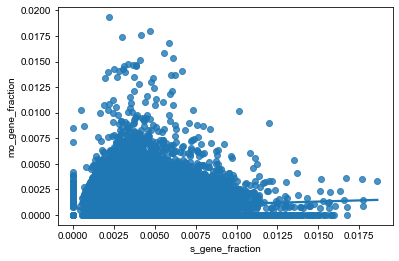

In [11]:
sns.regplot(x='s_gene_fraction',y="mo_gene_fraction",data=df)

<Axes: xlabel='s_gene_fraction', ylabel='w_gene_fraction'>

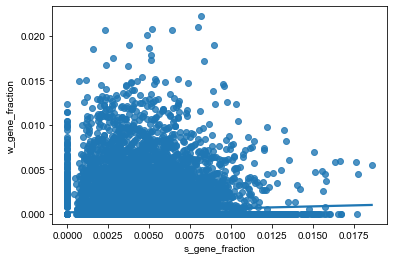

In [14]:
sns.regplot(x='s_gene_fraction',y="w_gene_fraction",data=df)

In [9]:
#df[df.domain.isin(['Archaea'])]

<AxesSubplot:xlabel='w_gene_fraction', ylabel='mo_gene_fraction'>

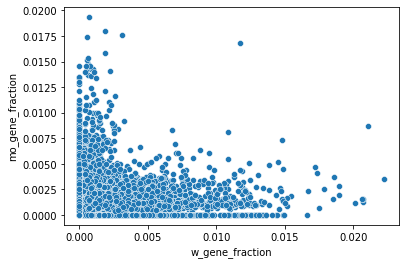

In [88]:
sns.scatterplot(x='w_gene_fraction',y='mo_gene_fraction',data=df)

<AxesSubplot:xlabel='w_genes', ylabel='mo_genes'>

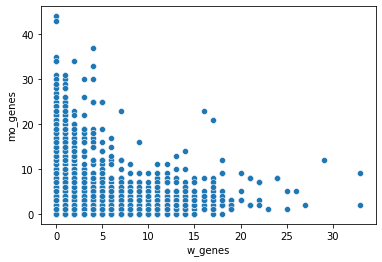

In [89]:
sns.scatterplot(x='w_genes',y='mo_genes',data=df)

In [12]:
metadata = pd.read_csv("../data/taxa/Mark_Westoby_Organism_Metadata_Export_02152018.txt",sep='\t')

/var/folders/17/58pxvfhj0gb_wz2nzgrzc6pc0000gn/T/ipykernel_16550/407774959.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("../data/taxa/Mark_Westoby_Organism_Metadata_Export_02152018.txt",sep='\t')


In [93]:
#metadata

In [13]:
# get ncbi taxa ids for gtdb genomes
archaea = pd.read_csv("../data/taxa/ar53_metadata_r207.tsv",sep='\t')
archaea = archaea[['accession','ncbi_taxid']]

bacteria = pd.read_csv("../data/taxa/bac120_metadata_r207.tsv",sep='\t')
bacteria = bacteria[['accession','ncbi_taxid']]

archaea['domain'] = "Archaea"
bacteria['domain'] = "Bacteria"

gtdb_to_ncbi = pd.concat([archaea,bacteria],axis=0)

/var/folders/17/58pxvfhj0gb_wz2nzgrzc6pc0000gn/T/ipykernel_16550/2645816966.py:5: DtypeWarning: Columns (61,65,74,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  bacteria = pd.read_csv("../data/taxa/bac120_metadata_r207.tsv",sep='\t')


In [24]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict,mo_genes,w_genes,w_gene_fraction,mo_gene_fraction,ncbi_taxid,domain
0,GB_GCA_014654065.1,0,773,{},0,0,0.0,0.000000,NaN,NaN
1,GB_GCA_002479145.1,0,722,{},0,0,0.0,0.000000,NaN,NaN
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000...",5,0,0.0,0.002009,NaN,NaN
3,GB_GCA_903829855.1,0,886,{},0,0,0.0,0.000000,NaN,NaN
4,GB_GCA_002923395.1,0,284,{},0,0,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{},0,0,0.0,0.000000,NaN,NaN
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'},1,0,0.0,0.000351,NaN,NaN
65700,RS_GCF_001953955.1,0,959,{},0,0,0.0,0.000000,NaN,NaN
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01...",3,0,0.0,0.000697,NaN,NaN


In [41]:
#aorGTDB.set_index('genome').join(gtdb_to_ncbi.set_index("accession"))

In [26]:
df2 = df.set_index("genome").join(gtdb_to_ncbi.set_index("accession"))

In [27]:
mdo2 =metadata[['NCBI_TAXONOMY_ID',"OXYGEN_REQUIREMENT"]].set_index("NCBI_TAXONOMY_ID")

In [28]:
df2 = df2.reset_index().set_index('ncbi_taxid').join(mdo2)
df2 = df2.drop_duplicates()

In [29]:
df2

,genome,mopterin_genes,total_annot_genes,gene_dict,domain,OXYGEN_REQUIREMENT
9,RS_GCF_900128725.1,0,298,{},Bacteria,(null)
14,GB_GCA_011333985.1,0,1199,{},Bacteria,NaN
24,RS_GCF_016406325.1,5,2496,"{'NZ_CP066370.1_480': 'K08352', 'NZ_CP066370.1...",Bacteria,Anaerobe
24,RS_GCF_016406325.1,5,2496,"{'NZ_CP066370.1_480': 'K08352', 'NZ_CP066370.1...",Bacteria,(null)
24,RS_GCF_016406305.1,6,2533,"{'NZ_CP066369.1_492': 'K08352', 'NZ_CP066369.1...",Bacteria,Anaerobe
...,...,...,...,...,...,...
2856340,GB_GCA_019218315.1,1,1556,{'JAHUUI010000003.1_248': 'K07811'},Bacteria,NaN
2856341,GB_GCA_019218365.1,0,918,{},Bacteria,NaN
2856342,GB_GCA_019218375.1,0,1071,{},Bacteria,NaN
2856343,GB_GCA_019218415.1,0,1086,{},Bacteria,NaN


In [39]:
#tf = [x for x in metadata['TEMPERATURE_RANGE'].unique().tolist() if "thermophile" in x.lower()]

In [40]:
#metadata[metadata['TEMPERATURE_RANGE'].isin(tf)]
#metadata['ECOSYSTEM_SUBTYPE'].unique()

In [41]:
#list(metadata)
#metadata['SPECIFIC_ECOSYSTEM'].unique()

In [42]:
#df2.OXYGEN_REQUIREMENT.unique()

In [ ]:
## df2 = df.reset_index().set_index('ncbi_taxid').join(mdo2)
#df2 = df2.drop_duplicates()

#possible = ['Anaerobe', 'Obligate aerobe', 'Aerobe','Microaerophilic', 'Facultative', 'Obligate anaerobe','Facultative anaerobe']
#df2 = df2[df2.OXYGEN_REQUIREMENT.isin(possible)]

possible = ['Obligate aerobe', 'Aerobe',"Anaerobe",'Obligate anaerobe']
df2 = df2[df2.OXYGEN_REQUIREMENT.isin(possible)]

#aerobe = ['Obligate aerobe', 'Aerobe',"Microaerophilic","Facultative","Facultative anaerobe"]
#df2['o2_tol']= df2["OXYGEN_REQUIREMENT"].isin(aerobe)
aerobe = ['Obligate aerobe', 'Aerobe']
df2['o2_tol']= df2["OXYGEN_REQUIREMENT"].isin(aerobe)

glabel = {}
glabel[True] = 'Aerobe'
glabel[False] = 'Anaerobe'

df2['physiology'] = df2["o2_tol"].apply(lambda x: glabel[x])

In [36]:
df2[["genome","total_annot_genes","gene_dict","domain","physiology"]].set_index("genome").to_csv("AerobeAnaerobe.csv")

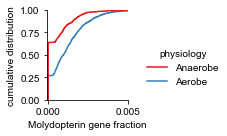

In [29]:
#figure = plt.figure()
sns.displot(x='mo_gene_fraction',data=df2,hue='physiology',kind="ecdf",palette='Set1',aspect=1,height=2)
plt.xlabel('Molydopterin gene fraction')
plt.ylabel('cumulative distribution')
plt.xlim([-0.0001,0.005])
plt.savefig('ecdf.molydopterin.geneFrac.24Nov2022.small.svg')

<Axes: xlabel='physiology', ylabel='mo_gene_fraction'>

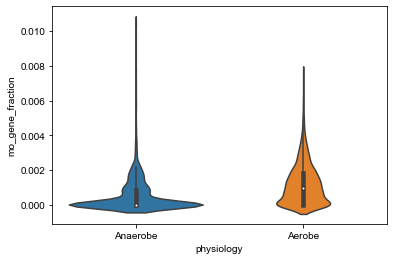

In [25]:
sns.violinplot(x="physiology",y="mo_gene_fraction",data=df2)

Text(18.43982928240741, 0.5, 'cumulative distribution')

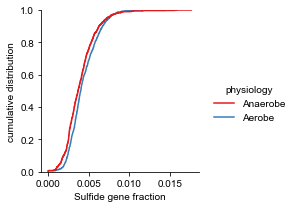

In [53]:
#figure = plt.figure()
sns.displot(x='s_gene_fraction',data=df2,hue='physiology',kind="ecdf",palette='Set1',aspect=1,height=3)
plt.xlabel('Sulfide gene fraction')
plt.ylabel('cumulative distribution')
#plt.xlim([-0.0001,0.005])

<AxesSubplot:xlabel='w_gene_fraction', ylabel='s_gene_fraction'>

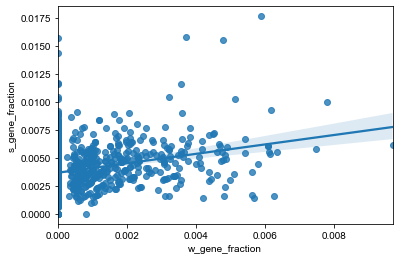

In [61]:
sns.regplot(x="w_gene_fraction",y="s_gene_fraction",data=df2[~df2["o2_tol"]])

<AxesSubplot:xlabel='mo_gene_fraction', ylabel='s_gene_fraction'>

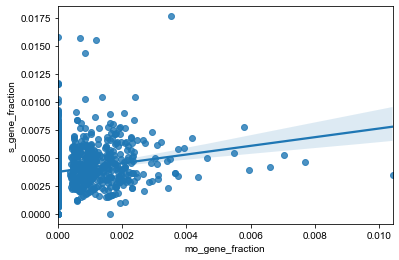

In [62]:
sns.regplot(x="mo_gene_fraction",y="s_gene_fraction",data=df2[~df2["o2_tol"]])

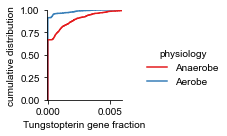

In [28]:
#figure = plt.figure()
sns.displot(x='w_gene_fraction',data=df2,hue='physiology',kind="ecdf",palette='Set1',aspect=1,height=2)
plt.xlabel('Tungstopterin gene fraction')
plt.ylabel('cumulative distribution')
plt.xlim([-0.0001,0.006])
plt.savefig('ecdf.tungstodopterin.geneFrac.24Nov2022.small.svg')

In [140]:
df2.groupby('physiology').count()

,genome,mopterin_genes,total_annot_genes,gene_dict,mo_genes,w_genes,w_gene_fraction,mo_gene_fraction,domain,OXYGEN_REQUIREMENT,o2_tol
physiology,,,,,,,,,,,
Aerobe,1592,1592,1592,1592,1592,1592,1592,1592,1592,1592,1592
Anaerobe,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202


In [186]:
dfs = []
for idx,row in df2.iterrows():
    kolist = list(eval(row.gene_dict).values())
    k = list(set(kolist))
    g = pd.DataFrame({"KO":k,'counts': [kolist.count(x) for x in list(set(k))]})
    g['counts_n'] = g.counts / row.total_annot_genes
    g['genome'] = row.genome
    dfs.append(g)
dfs_genome_kegg_counts = pd.concat(dfs,axis=0)
dfg = dfs_genome_kegg_counts.pivot_table(index="genome",columns='KO',values='counts').fillna(0)


In [283]:
list(dfg)

['K00087',
 'K00203',
 'K00367',
 'K00370',
 'K00387',
 'K02567',
 'K03520',
 'K03738',
 'K04108',
 'K05301',
 'K07303',
 'K07306',
 'K07469',
 'K07811',
 'K07812',
 'K08348',
 'K08352',
 'K08356',
 'K11177',
 'K11389',
 'K12528',
 'K13482',
 'K18020',
 'K18030',
 'K18361',
 'K19187',
 'K20625',
 'K21307',
 'K22015']

In [284]:
import cbtk.kegg as kegg_api

In [285]:
kos = kegg_api.list('ko')
kos.columns = ['KO','name']
kos['KO'] = kos['KO'].apply(lambda x: x.split(':')[1])

In [311]:
kos['gene_name'] = kos["name"].apply(lambda x: x.split(";")[0])

In [357]:
kos.to_csv("keggGeneNames.csv")

In [189]:
df2.total_annot_genes.values

array([2496, 2533, 2842, ..., 2376, 1859, 3385])

In [212]:
dfgc = dfs_genome_kegg_counts.pivot_table(index="genome",columns='KO',values='counts_n').fillna(0)


In [235]:
#
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [236]:
X = dfgc.join(df2.set_index("genome")[["physiology"]]).set_index('physiology')
ustats,pvals = mannwhitneyu(X.loc['Aerobe'],X.loc['Anaerobe'])
lfc = np.log2((X.loc['Aerobe'].mean() + 1e-6) / (X.loc['Anaerobe'].mean()+ 1e-6))
reject,adjpval,alphacSidak,alphacBonf =  multipletests(pvals,method="fdr_bh")
stat_results = pd.DataFrame({'KO': list(X),'ustat': ustats ,'pval': pvals, 'FoldChange (log2)': lfc, 'p-val (adj)': adjpval})
stat_results["q-val (log10)"]= stat_results["p-val (adj)"].apply(lambda x: -np.log10(x))
stat_results = stat_results.join(kos.set_index('KO'))
stat_results["genes"] = stat_results["gene_name"].apply(lambda x: x.replace(', ','/'))

In [321]:
stat_results["genes"] = stat_results["gene_name"].apply(lambda x: x.replace(', ','/'))

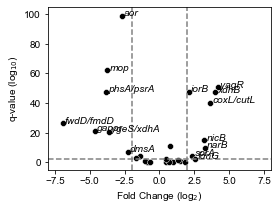

In [324]:
plt.figure(figsize=(4,3))
ax = sns.scatterplot(x="FoldChange (log2)",y="q-val (log10)",data=stat_results,color="k")
#plt.hlines()
fccutoff = 2
qcutoff = -np.log10(0.01)
trans = 0.15
for i, row in stat_results.iterrows():
    if ((abs(row['FoldChange (log2)']) > fccutoff) &  ((row['q-val (log10)']) > qcutoff)):
        ax.annotate(row.genes, (row["FoldChange (log2)"]+trans,row["q-val (log10)"]+trans),style='italic')
plt.hlines(qcutoff,-8,8,color='grey',linestyles="dashed")
plt.xlim([-8,8])
#plt.vlines(0,-5,105,color='grey',linestyles="dashed")
plt.vlines(fccutoff,-5,105,color='grey',linestyles="dashed")
plt.vlines(-fccutoff,-5,105,color='grey',linestyles="dashed")
plt.ylim([-5,105])
plt.xlabel('Fold Change (log$_2$)')
plt.ylabel('q-value (log$_{10}$)')
plt.savefig("aerobe_vs_anaerobe.pterins.svg")

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [94]:
pca  = PCA(n_components=2)

In [108]:
import numpy as np

In [206]:
scaler = StandardScaler() 
xn = scaler.fit_transform(dfg.values)
#xn = dfg.apply(lambda x: np.log2(x+(1/10000))).values

In [340]:
pca.fit(xn)
labels = ["PC{i}: ({x}%)".format(i=x[0],x=round(100*x[1],2)) for x in list(zip(range(1,n+1),pca.explained_variance_ratio_))]
pdfg = pd.DataFrame(pca.transform(xn),index=dfg.index,columns =labels)

In [341]:
pdfg

,PC1: (8.94%),PC2: (6.11%)
genome,,
GB_GCA_000010565.1,-2.871314,0.247552
GB_GCA_000016605.1,-0.802124,-0.893222
GB_GCA_000018565.1,-0.898734,-0.589625
GB_GCA_000024525.1,1.912505,-1.661146
GB_GCA_000026125.1,0.784867,0.319930
...,...,...
RS_GCF_904846225.1,-0.315383,-0.630531
RS_GCF_904846235.1,0.274022,-0.591057
RS_GCF_904846285.1,-0.088211,-0.162783


In [342]:
pdfg = pdfg.join(df2.set_index('genome')).join(dfg)

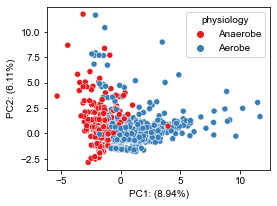

In [344]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=labels[0],y=labels[1],data=pdfg,hue='physiology',palette='Set1')
plt.savefig("PCAplot.svg")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

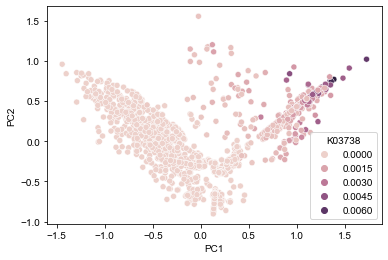

In [139]:
sns.scatterplot(x='PC1',y="PC2",data=pdfg,hue='K03738')

In [137]:
pd.DataFrame(pca.components_.T,index=list(dfg),columns = ['PC1','PC2']).sort_values('PC1')

,PC1,PC2
K07303,-0.492104,0.550612
K11177,-0.328025,0.075569
K03520,-0.324172,0.270031
K13482,-0.251547,0.059347
K18030,-0.133804,0.106582
K21307,-0.071290,0.103779
K05301,-0.046923,0.029381
K00370,-0.028876,-0.436866
K00367,-0.023967,-0.029875
K02567,-0.016645,0.074671


In [ ]:
list(df2)

In [141]:
x = df2[df2["o2_tol"]].mo_gene_fraction.values
y = df2[~df2["o2_tol"]].mo_gene_fraction.values
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=1338268.5, pvalue=4.927386905661337e-79)

In [142]:
x = df2[df2["o2_tol"]].w_gene_fraction.values
y = df2[~df2["o2_tol"]].w_gene_fraction.values
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=710969.0, pvalue=3.1964707631378293e-64)

In [86]:
#df[df.domain.isin(['Bacteria'])].sort_values("w_gene_fraction")

In [100]:
dfgapor = df[df['gene_dict'].apply(lambda x: "K11389" in x)]

In [113]:
res = {'genome': [], 'gene': []}
dfgapor = df[df['gene_dict'].apply(lambda x: "K11389" in x)]
for genome,row in dfgapor.iterrows():
    genes = [x[0] for x in eval(row.gene_dict).items() if x[1] == "K11389"]
    res['genome'] = res['genome'] +  [genome for x in genes]
    res['gene'] = res['gene'] + genes
    
res = pd.DataFrame(res)
res['kegg_id'] = "K11389"

gapor = res.copy()

res = {'genome': [], 'gene': []}
dfaor = df[df['gene_dict'].apply(lambda x: "K03738" in x)]
for genome,row in dfaor.iterrows():
    genes = [x[0] for x in eval(row.gene_dict).items() if x[1] == "K11389"]
    res['genome'] = res['genome'] +  [genome for x in genes]
    res['gene'] = res['gene'] + genes
    
res = pd.DataFrame(res)
res['kegg_id'] = "K03738"

aor = res.copy()


In [117]:
gapor.to_csv("../data/gapor.gtdb.csv")
aor.to_csv("../data/aor.gtdb.csv")

In [17]:
pterin_syn = pd.read_csv("../data/pterinSynthesisFeasible.26Oct2022.csv",index_col=0)
pterin_syn['genome'] = pterin_syn['genome'].apply(lambda x: x.split('_protein')[0])
pterin_syn.set_index('genome',inplace=True)

In [18]:
dg = df.join(pterin_syn)

In [23]:
dg2 = df2.set_index('genome').join(pterin_syn)

In [35]:
stats.fisher_exact()

AttributeError: module 'scipy.stats' has no attribute 'fishertest'

In [36]:
X = pd.crosstab(dg2['o2_tol'],dg2['feasible']).values
stats.fisher_exact(X)

(11.268990153253869, 1.762008238168952e-154)

In [39]:
X =pd.crosstab(dg2['o2_tol'],dg2['feasible'])

In [42]:
X.T.sum()

o2_tol
False    1202
True     2148
dtype: int64

In [45]:
X.iloc[0] / 1202

feasible
False    0.913478
True     0.086522
dtype: float64

In [46]:
X.iloc[1] / 2148

feasible
False    0.483706
True     0.516294
Name: True, dtype: float64

In [87]:
sns.displot(x='mo_gene_fraction',hue='feasible',data=dg,kind='ecdf')
plt.xlim([-0.0001,0.0075])

NameError: name 'dg' is not defined

<AxesSubplot:xlabel='num_pterin_synthesis_genes', ylabel='mo_gene_fraction'>

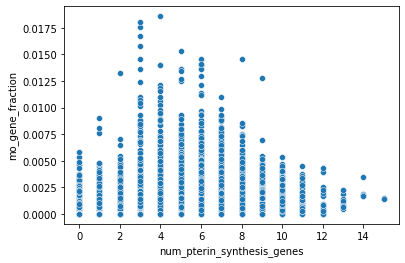

In [135]:
sns.scatterplot(x='num_pterin_synthesis_genes',y='mo_gene_fraction',data=dg)

In [158]:
tax = pd.read_csv("../data/gtdb_taxonomy.csv")

In [168]:
tax['phyla'] = tax['taxonomy'].apply(lambda x: [y for y in x.split(';') if "p__" in y][0])

In [178]:
tax = tax.set_index('genome')[['taxonomy','phyla']]

In [180]:
z = gapor.set_index('genome').join(tax)

In [183]:
len(z.phyla.unique())

37

In [185]:
z.sort_values("taxonomy")

,gene,kegg_id,taxonomy,phyla
genome,,,,
GB_GCA_016840485.1,JAEOSG010000085.1_4,K11389,d__Archaea;p__Asgardarchaeota;c__Baldrarchaeia...,p__Asgardarchaeota
GB_GCA_003660865.1,QMVA01000039.1_9,K11389,d__Archaea;p__EX4484-52;c__EX4484-52;o__EX4484...,p__EX4484-52
GB_GCA_017610525.1,JAFCBW010000071.1_3,K11389,d__Archaea;p__EX4484-52;c__EX4484-52;o__EX4484...,p__EX4484-52
GB_GCA_017610545.1,JAFCBV010000053.1_1,K11389,d__Archaea;p__EX4484-52;c__EX4484-52;o__EX4484...,p__EX4484-52
GB_GCA_015520605.1,WAPT01000004.1_13,K11389,d__Archaea;p__EX4484-52;c__EX4484-52;o__EX4484...,p__EX4484-52
...,...,...,...,...
GB_GCA_002418835.1,DIEX01000026.1_90,K11389,d__Bacteria;p__Spirochaetota;c__UBA4802;o__UBA...,p__Spirochaetota
GB_GCA_002425885.1,DINC01000289.1_8,K11389,d__Bacteria;p__Spirochaetota;c__UBA4802;o__UBA...,p__Spirochaetota
GB_GCA_009885955.1,VFJS01000022.1_21,K11389,d__Bacteria;p__Spirochaetota;c__UBA4802;o__UBA...,p__Spirochaetota


In [189]:
z['domain'] = z['taxonomy'].apply(lambda x: x.split('d__')[1].split(';')[0])

In [204]:
subs = []
for phyla, dff in z.groupby('phyla'):
    subs.append(dff.sample(1))

In [206]:
phyla_reps = pd.concat(subs,axis=0)

In [209]:
from Bio import SeqIO

In [213]:
gapor_seqs =  SeqIO.to_dict(SeqIO.parse("../data/gapor.fa","fasta"))

In [220]:
gapor_seqs_subset = {x:y for x,y in gapor_seqs.items() if x in phyla_reps.gene.tolist()}

In [221]:
with open('../data/gapor.phyla.fa', 'w') as handle:
    SeqIO.write(gapor_seqs_subset.values(), handle, 'fasta')

In [239]:
phyla_reps[phyla_reps.gene == 'DSZG01000016.1_5']

,gene,kegg_id,taxonomy,phyla,domain
genome,,,,,
GB_GCA_011367165.1,DSZG01000016.1_5,K11389,d__Archaea;p__Hadarchaeota;c__Hadarchaeia;o__H...,p__Hadarchaeota,Archaea


In [242]:
phyla_reps.to_csv("../data/gapor.phyla.csv")

In [248]:
gz= df[df.mopterin_genes>0]

In [252]:
gz['kos']= gz['gene_dict'].apply(lambda x: [y for x,y in eval(x).items()])

<ipython-input-252-4bbc324c1b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gz['kos']= gz['gene_dict'].apply(lambda x: [y for x,y in eval(x).items()])


In [256]:
all_kos = gz['kos'].tolist()

In [261]:
ko_groups = list(set([x for sublist in all_kos for x in sublist]))

In [262]:
len(ko_groups)

27

In [271]:
copys = []
num_genomes = []
for x in ko_groups:
    copy_num = gz.kos.apply(lambda z: len([y for y in z if y == x])).sum()
    genomes_cp = gz.kos.apply(lambda z: len([y for y in z if y == x]) > 0).sum()
    copys.append(copy_num)
    num_genomes.append(genomes_cp)


In [277]:
q = pd.DataFrame({'ko':ko_groups,'copy_nums':copys,'genome_rep':num_genomes})

In [280]:
#q.sort_values('genome_rep')